<a href="https://colab.research.google.com/github/Tripti-Patel/LearningAndWorkingAI/blob/main/GoogleColab/CV_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import show_rgb_image, show_binary_image, sample_gaussian, zero_cross
from scipy.io import loadmat
from skimage.measure import label as skimage_label
from skimage.metrics import (adapted_rand_error, contingency_table,
                              variation_of_information)
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
import cv2

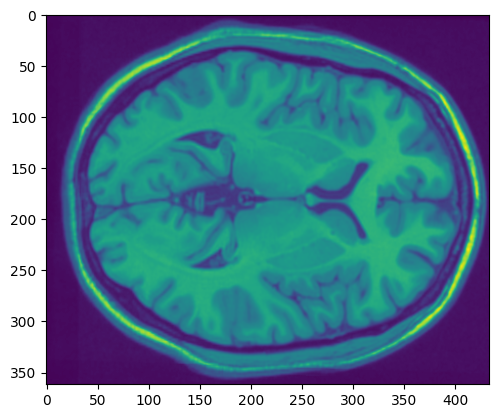

In [6]:
data = loadmat('Brain.mat')
T1 = data['T1']
label = data['label']

plt.imshow(T1[:, :, 0])

In [18]:
# def otsu_segmentation(image):
#     threshold_value = threshold_otsu(image)
#     segmented_image = image > threshold_value
#     plt.imshow(segmented_image)
#     return segmented_image

def evaluate_segmentation(segmented_image, ground_truth):
    # Calculate evaluation metrics
    # Example: Dice coefficient
    intersection = np.logical_and(segmented_image, ground_truth)
    dice_coefficient = 2.0 * intersection.sum() / (segmented_image.sum() + ground_truth.sum())
    return dice_coefficient

def eval_matrix(segmented_image, label_img):
    # Assuming seg_result and ground_truth are arrays representing the segmented results and ground truth labels, respectively

    # Calculate True Positives (TP), False Positives (FP), and False Negatives (FN)
    TP = np.sum(segmented_image & label_img)
    FP = np.sum(segmented_image & (~label_img))
    FN = np.sum((~segmented_image) & label_img)
    TN = np.sum((~segmented_image) & label_img)

    # Calculate Dice coefficient
    dice_coefficient = 2 * TP / (2 * TP + FP + FN)

    # Calculate Jaccard index
    jaccard_index = TP / (TP + FP + FN)

    # Calculate pixel accuracy
    pixel_accuracy = (TP + TN) / (TP + FP + TN + FN)

    # Print the calculated metrics
    print("Dice coefficient:", dice_coefficient)
    print("Jaccard index:", jaccard_index)
    print("Pixel accuracy:", pixel_accuracy)

def show_compared_images(t1_image, label_image, segmented_image, n_cluster):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 15))
    # Plot Original T1 Image
    img1 = ax1.imshow(t1_image)
    fig.colorbar(img1, ax=ax1, location='bottom',pad=0.01)
    ax1.set_title('Original T1 Image', fontsize=15)
    ax1.axis('off')

    # Plot Label Image with Colorbar
    img2 = ax2.imshow(label_image)
    fig.colorbar(img2, ax=ax2, location='bottom',pad=0.01)
    ax2.set_title('Label Image', fontsize=15)
    ax2.axis('off')

    # Plot Segmented Image
    img3 = ax3.imshow(segmented_image)
    fig.colorbar(img3, ax=ax3, location='bottom', pad=0.01)
    text = str(n_cluster) + ' K Clusters'
    ax3.set_title(text, fontsize=15)
    ax3.axis('off')

    plt.show()

def process_images(n_cluster):
    for i in range(10):
        segmented_image = kmeans_segmentation(T1[:,:,i], n_cluster)
        show_compared_images(T1[:,:,i], label[:,:,i], segmented_image, n_cluster)
        print('Level  '+ str(i) + ' Image')
        eval_matrix(segmented_image, label[:,:,i])
        print(evaluate_segmentation(segmented_image, label[:,:,i]))

In [33]:
def kmeans_segmentation(image, n_clusters=5):
    image = cv2.normalize(image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    reshaped_image = np.reshape(image, (-1, 1))

    #X_normalised = (reshaped_image - np.mean(reshaped_image))/np.std(reshaped_image)
    #print(image)
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, max_iter = 50, n_init=10).fit(reshaped_image)
    segmented_image = np.reshape(kmeans.labels_, image.shape)
    return segmented_image

[[2.92674    2.8644688  2.9890108  ... 0.80952376 0.9340659  1.058608  ]
 [3.5494504  3.6117215  3.4871795  ... 1.058608   1.120879   1.120879  ]
 [3.7985344  3.7362635  3.6117215  ... 0.80952376 0.99633694 0.99633694]
 ...
 [3.175824   2.9890108  3.238095   ... 6.6630034  6.8498163  7.0366297 ]
 [3.4871795  3.175824   3.3626373  ... 6.3516483  6.7875457  6.9120874 ]
 [3.238095   3.051282   3.113553   ... 5.728937   6.3516483  6.9743586 ]]


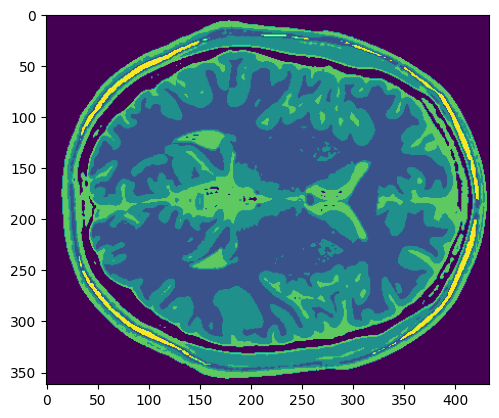

In [31]:
plt.imshow(kmeans_segmentation(T1[:,:,0]))

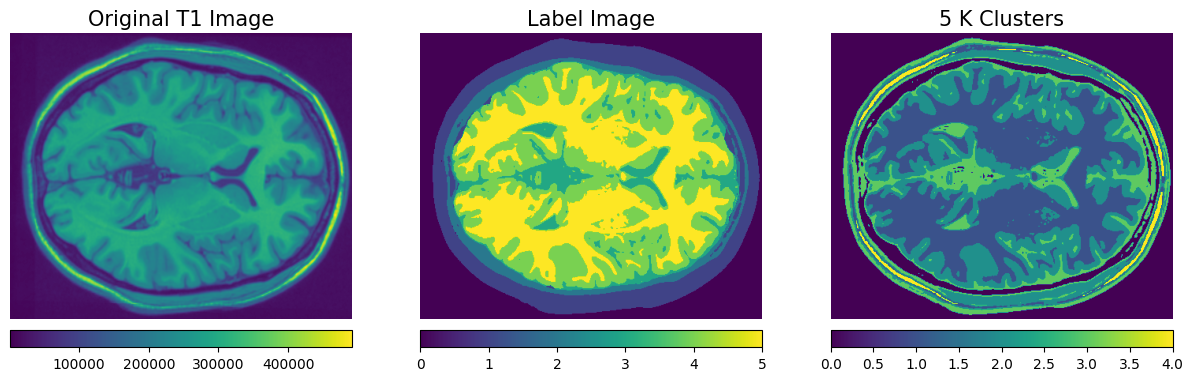

Level  0 Image
Dice coefficient: 0.25771737194287886
Jaccard index: 0.14791938333809151
Pixel accuracy: 0.47295776832534914
0.3587111778801719


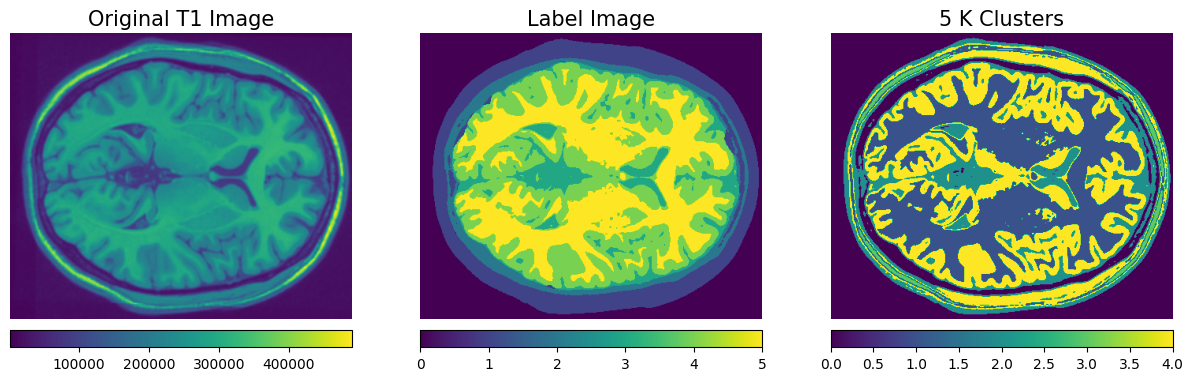

Level  1 Image
Dice coefficient: 0.5921082911559277
Jaccard index: 0.420563802909294
Pixel accuracy: 0.5953618885057141
0.3246021912438639


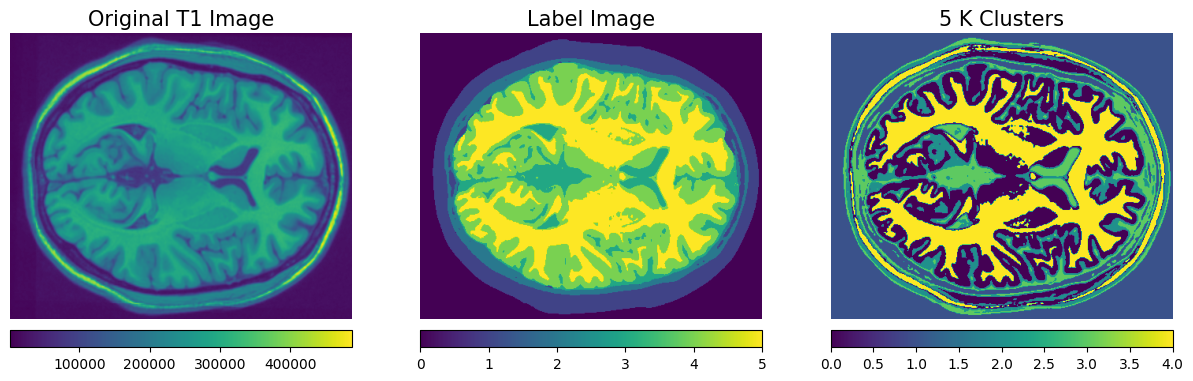

Level  2 Image
Dice coefficient: 0.4522818535766089
Jaccard index: 0.2922249471725735
Pixel accuracy: 0.5217776166200968
0.22439270173295672


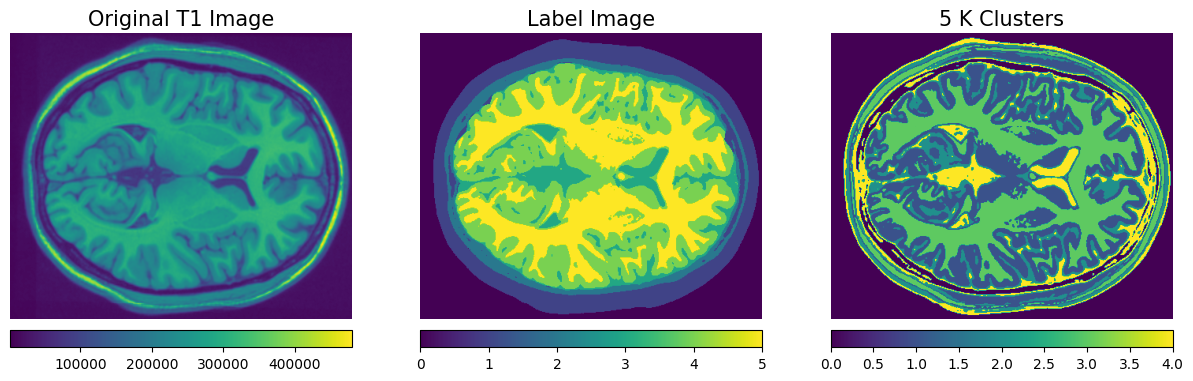

Level  3 Image
Dice coefficient: 0.15953759424116545
Jaccard index: 0.08668343006734065
Pixel accuracy: 0.4237139494523479
0.3434285161840431


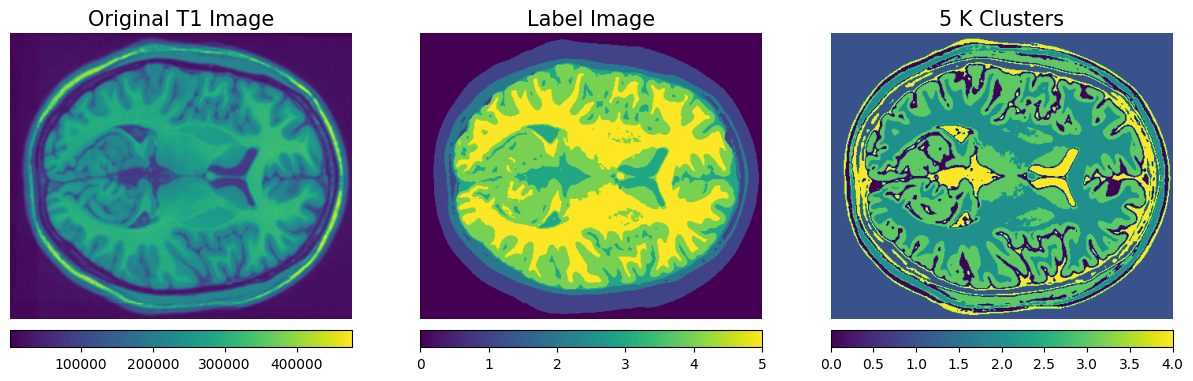

Level  4 Image
Dice coefficient: 0.0301290148026292
Jaccard index: 0.015294917803772021
Pixel accuracy: 0.3672353022245129
0.2770584567126907


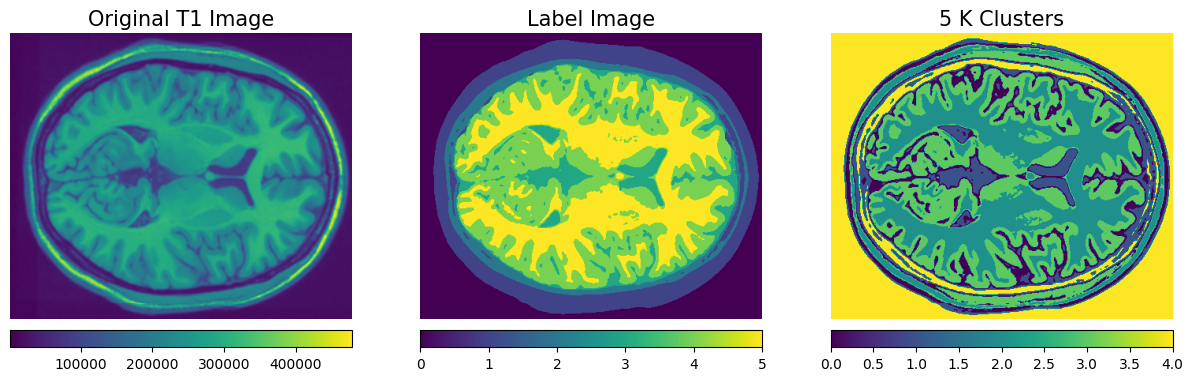

Level  5 Image
Dice coefficient: 0.054313866248229155
Jaccard index: 0.027915019440210742
Pixel accuracy: 0.3431337248194804
0.24234900991671485


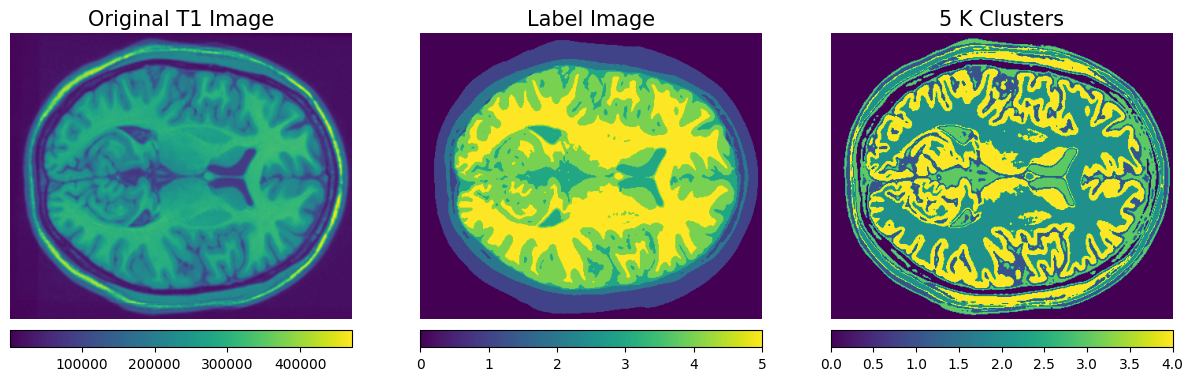

Level  6 Image
Dice coefficient: 0.5083813765503964
Jaccard index: 0.3408253078623303
Pixel accuracy: 0.5376914538171732
0.3149731463315195


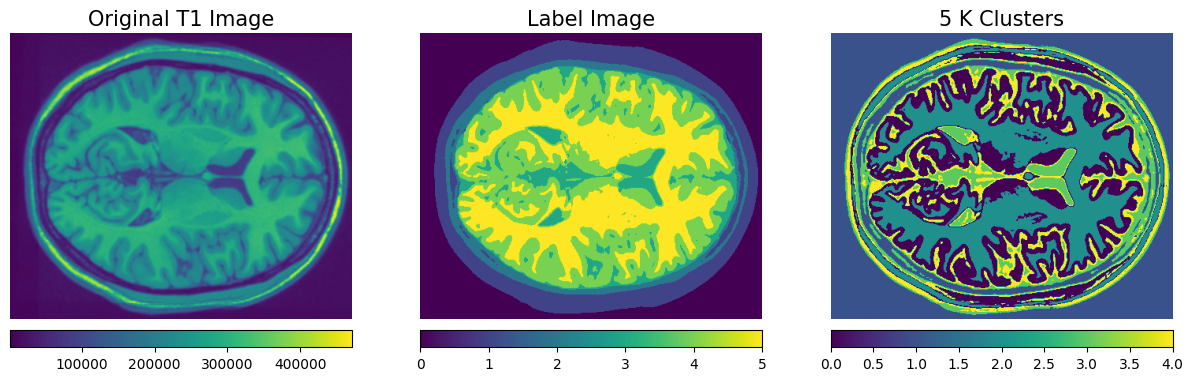

Level  7 Image
Dice coefficient: 0.20456689218629548
Jaccard index: 0.11393735099125815
Pixel accuracy: 0.4374779903744571
0.23783782058341432


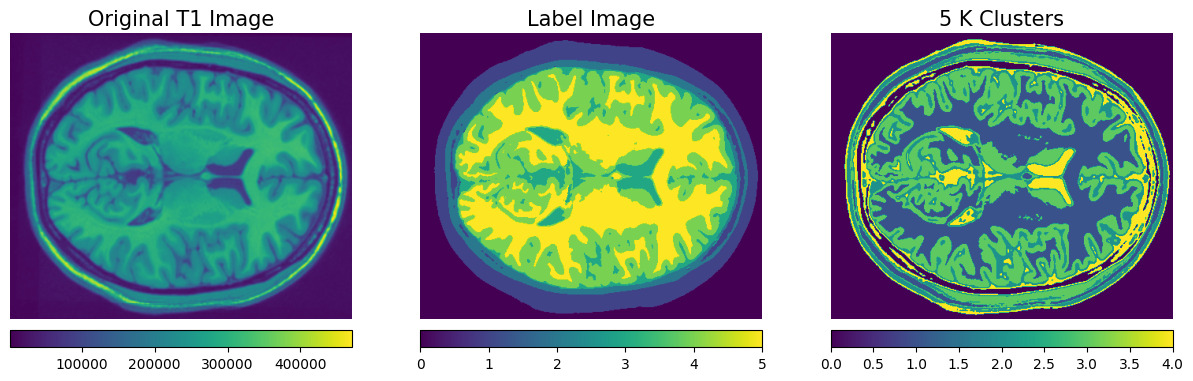

Level  8 Image
Dice coefficient: 0.16311737377953014
Jaccard index: 0.08880119581464872
Pixel accuracy: 0.4207979064186511
0.3341361277902337


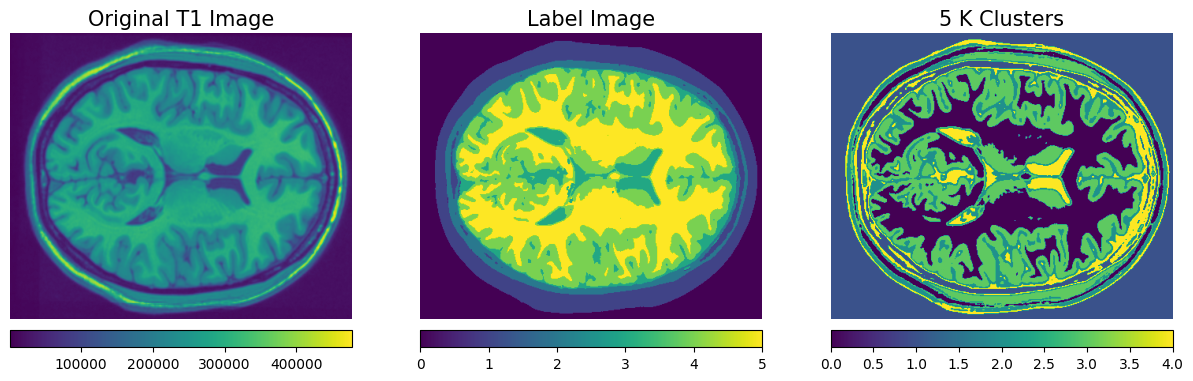

Level  9 Image
Dice coefficient: 0.05403124980753715
Jaccard index: 0.027765733546437105
Pixel accuracy: 0.38658397049455956
0.23855538926765577


In [22]:
process_images(5)

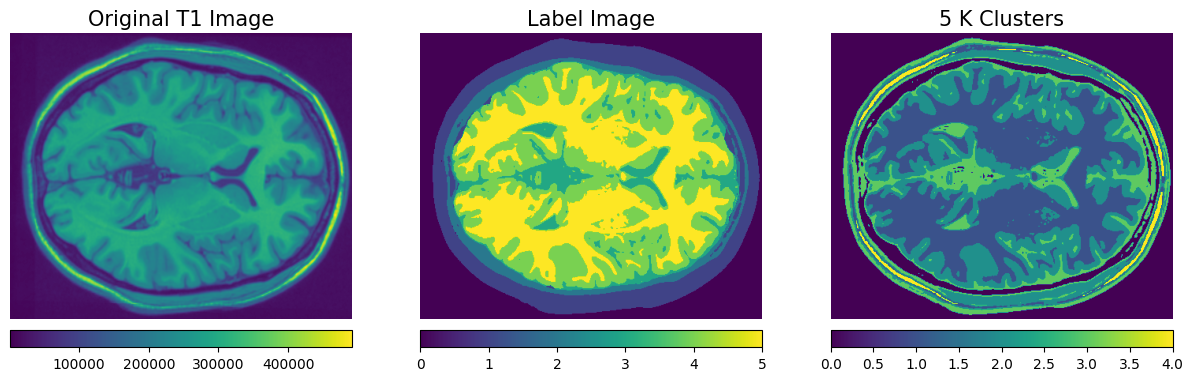

Level  0 Image
Dice coefficient: 0.25771737194287886
Jaccard index: 0.14791938333809151
Pixel accuracy: 0.47295776832534914
0.3587111778801719


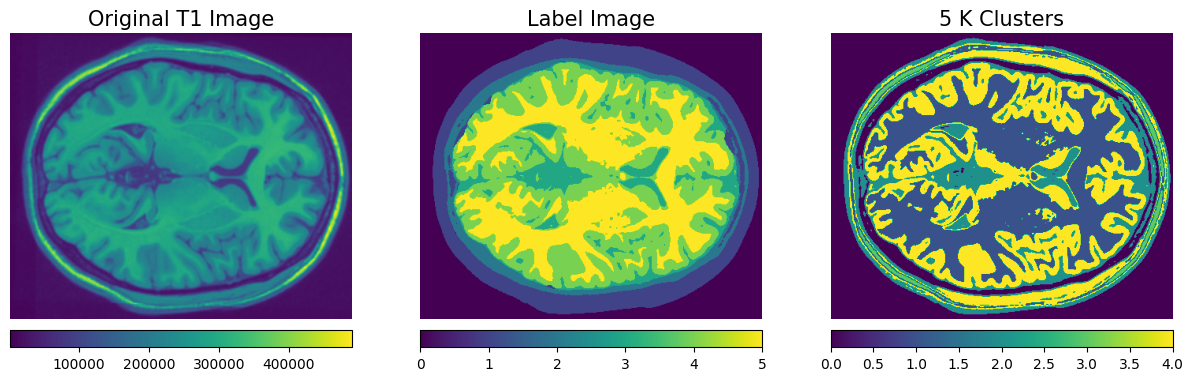

Level  1 Image
Dice coefficient: 0.5921082911559277
Jaccard index: 0.420563802909294
Pixel accuracy: 0.5953618885057141
0.3246021912438639


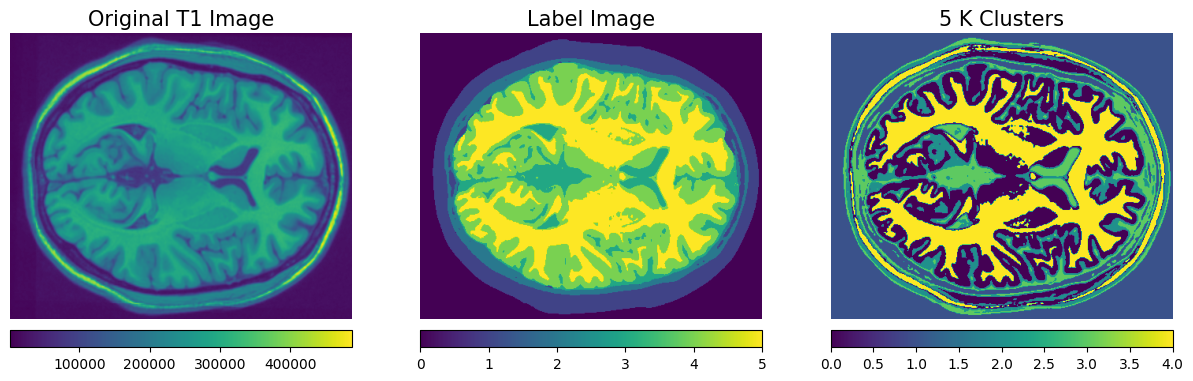

Level  2 Image
Dice coefficient: 0.4522818535766089
Jaccard index: 0.2922249471725735
Pixel accuracy: 0.5217776166200968
0.22439270173295672


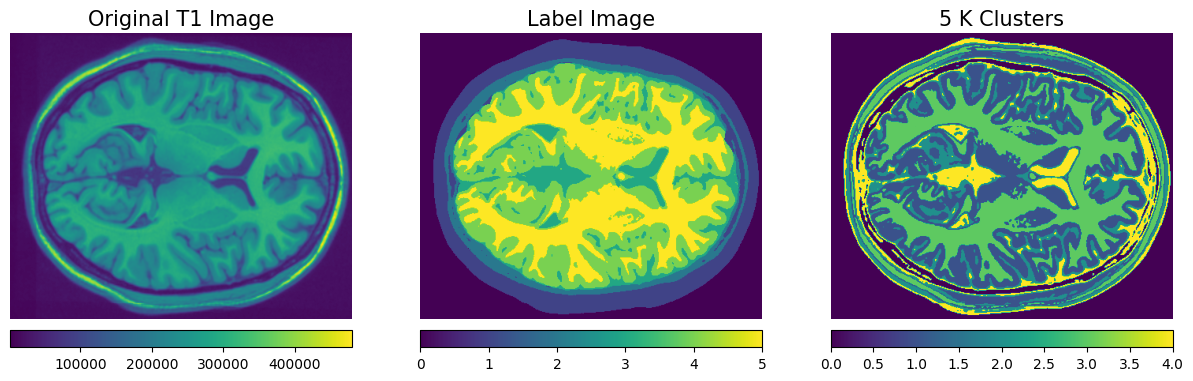

Level  3 Image
Dice coefficient: 0.15953759424116545
Jaccard index: 0.08668343006734065
Pixel accuracy: 0.4237139494523479
0.3434285161840431


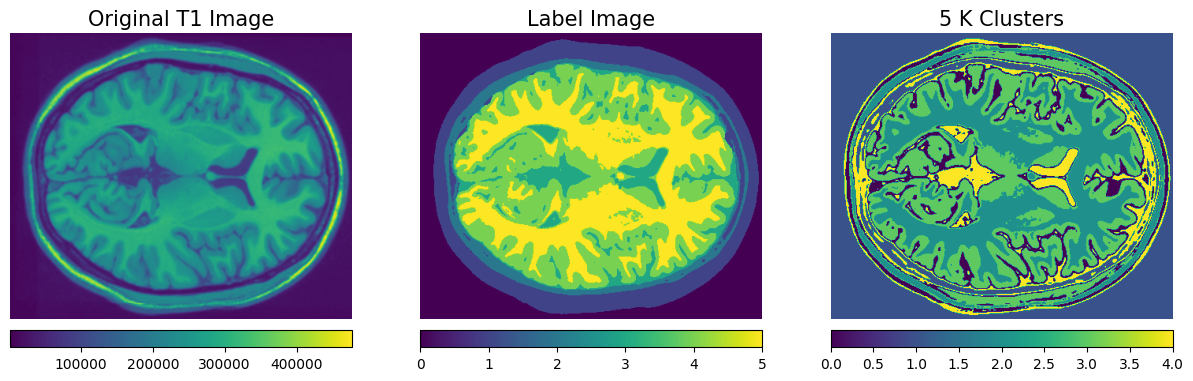

Level  4 Image
Dice coefficient: 0.030101452400142968
Jaccard index: 0.01528071201271703
Pixel accuracy: 0.3672616496523182
0.27705722922512127


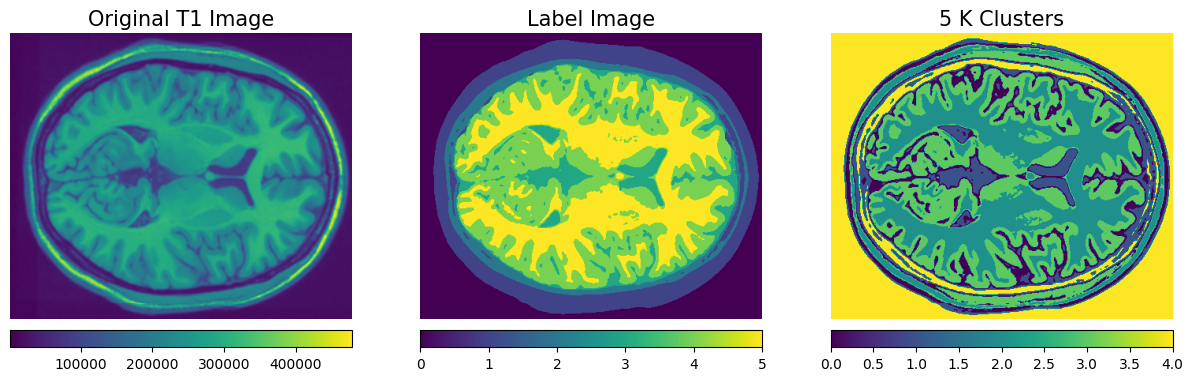

Level  5 Image
Dice coefficient: 0.054313866248229155
Jaccard index: 0.027915019440210742
Pixel accuracy: 0.3431337248194804
0.24234900991671485


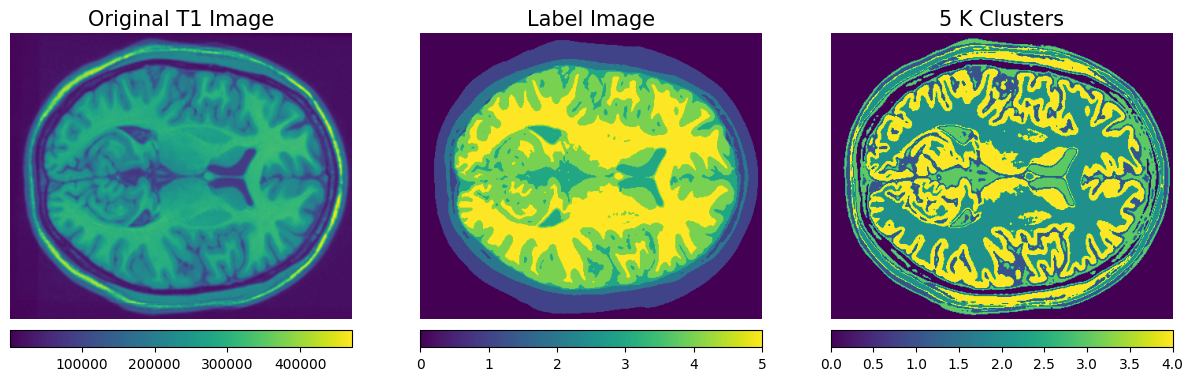

Level  6 Image
Dice coefficient: 0.5083813765503964
Jaccard index: 0.3408253078623303
Pixel accuracy: 0.5376914538171732
0.3149731463315195


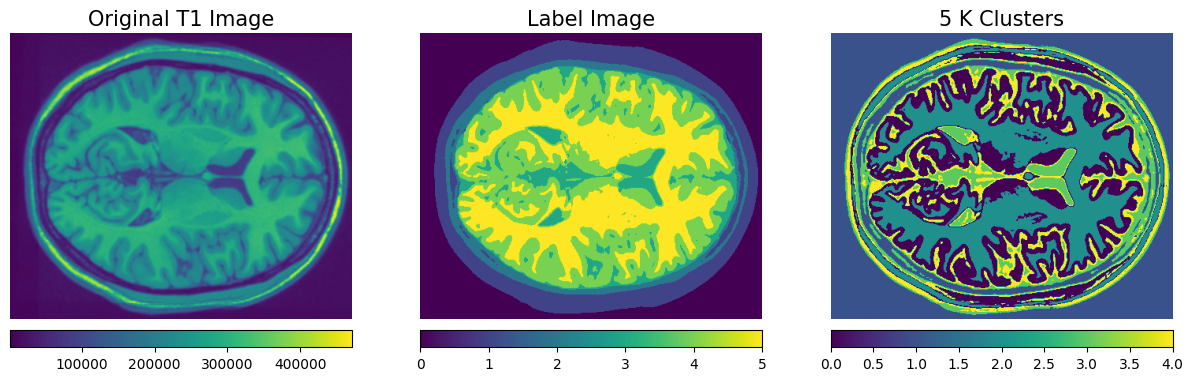

Level  7 Image
Dice coefficient: 0.20456689218629548
Jaccard index: 0.11393735099125815
Pixel accuracy: 0.4374779903744571
0.23783782058341432


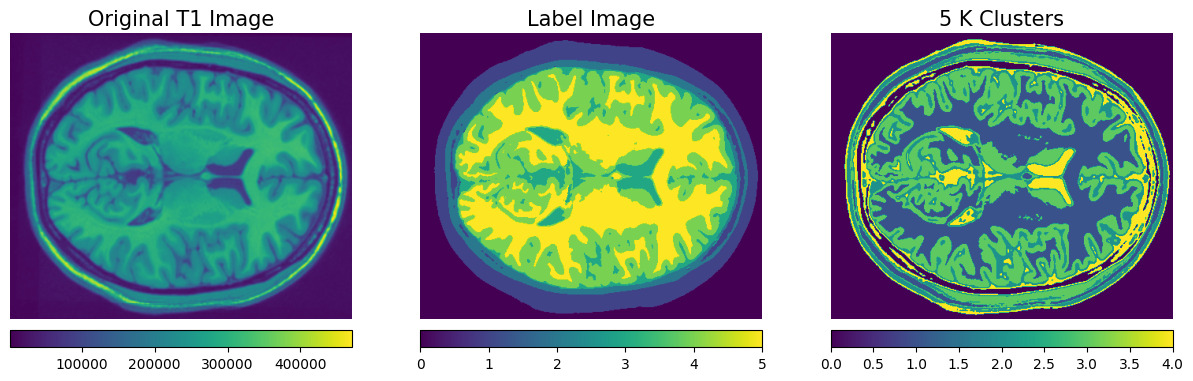

Level  8 Image
Dice coefficient: 0.16311737377953014
Jaccard index: 0.08880119581464872
Pixel accuracy: 0.4207979064186511
0.3341361277902337


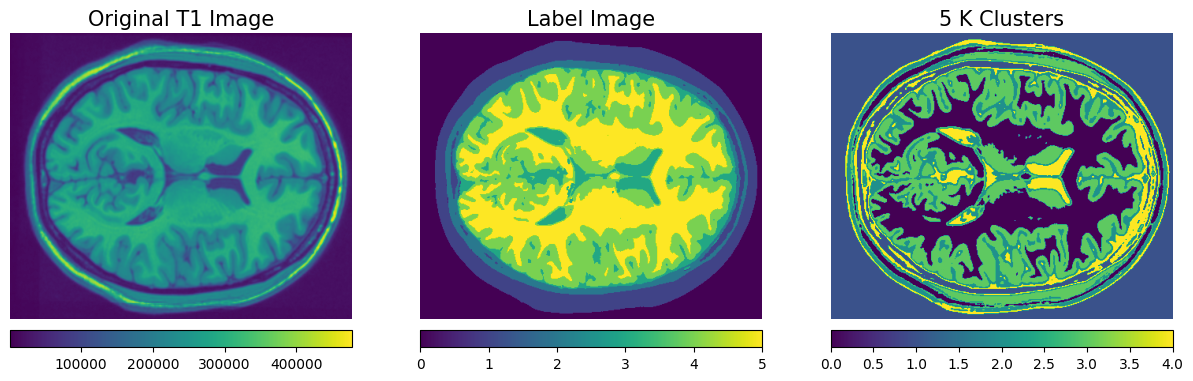

Level  9 Image
Dice coefficient: 0.05403124980753715
Jaccard index: 0.027765733546437105
Pixel accuracy: 0.38658397049455956
0.23855538926765577


In [34]:
process_images(5)